In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
times_list = [str(3600 * (i + 1)) for i in range(6)]
area_one_length = 9

In [3]:
from collections import namedtuple
ARGS_FOR_LIST = namedtuple('FOR_LIST', ('dir', 'ratio', 'seed', 'csv'))

def get_for_list():
    dir_list = ['p10000', 'p20000', 'p30000']
    ratio_list = ['r4', 'r5', 'r6']
    seed_list = ['s'+str(123 + i) for i in range(1)]
    csv_list = ['census', 'mobile']

    return ARGS_FOR_LIST(dir_list, ratio_list, seed_list, csv_list)

In [4]:
def get_read_path(name):
    path = '/Users/kessapassa/OneDrive/research_log/20190331/' + name + '/'
    return path

def get_file_name(args):
    return args.dir + args.ratio + args.seed + '_' + args.csv + '.csv'

def get_full_path(name, args):
    return get_read_path(name) + get_file_name(args)

In [5]:
def for_default_init(func, array):
    for_list = get_for_list()
    
    for _dir in for_list.dir:
        array[_dir] = {}
        
        for _ratio in for_list.ratio:
            array[_dir][_ratio] = {}
            
            for _seed in for_list.seed:
                array[_dir][_ratio][_seed] = {}
                
                for _csv in for_list.csv:
                    array[_dir][_ratio][_seed][_csv] = {}
                    args = ARGS_FOR_LIST(_dir, _ratio, _seed, _csv)
                    func(args, array)

In [6]:
def for_default(func):
    for_list = get_for_list()  
    for _dir in for_list.dir:
        for _ratio in for_list.ratio:
            for _seed in for_list.seed:
                for _csv in for_list.csv:
                    args = ARGS_FOR_LIST(_dir, _ratio, _seed, _csv)
                    func(args)

In [7]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(area_one_length)]))
    return df

def create_empty_base():
    zeros = np.zeros((area_one_length, area_one_length))
    df = pd.DataFrame(zeros, columns=(['{0:02d}'.format(i*10) for i in range(area_one_length)]))
    df = df.sort_index(ascending=False)
    return df

In [8]:
create_base_dataframe()

,00,10,20,30,40,50,60,70,80


In [9]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[1])
        row = str(area_id // area_one_length)
        col = str(area_id % area_one_length) + '0'
        base.loc[row, col] = r[2]
        
    return base

In [10]:
csv_array = {}
def main(args, array):
    base = create_base_dataframe()
    df = pd.read_csv(get_full_path('2D', args),
                                                        encoding='Shift_JISx0213')
    df['time'] = df['time'].apply(lambda x: str(int(x)))

    group_list = df.groupby(['time'], sort=False)
    for _times, _group in group_list:
        df = convert_area_to_contour(base.copy(), _group.copy())
        df = df.sort_index(ascending=False)
        array[args.dir][args.ratio][args.seed][args.csv][_times] = df
        
for_default_init(main, csv_array)

In [13]:
def create_contour(time_number, file_name=False):
    time = times_list[time_number]
    print(time)
    df = csv_array[people][ratio][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))
        
    print(df.sum().sum())

In [14]:
def create_contour_base(df, file_name=False):
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))

In [15]:
people = 'p30000'
ratio = 'r6'
seed = 's123'
csv = 'mobile'

# コンター図

3600
1551.0


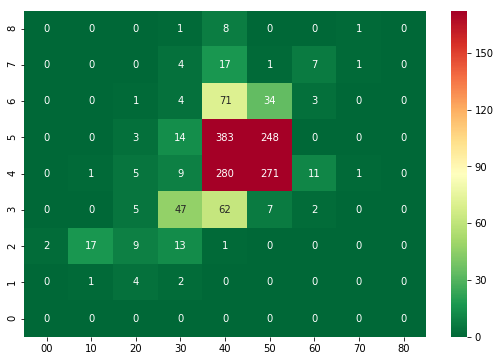

In [16]:
create_contour(0)

7200
3095.0


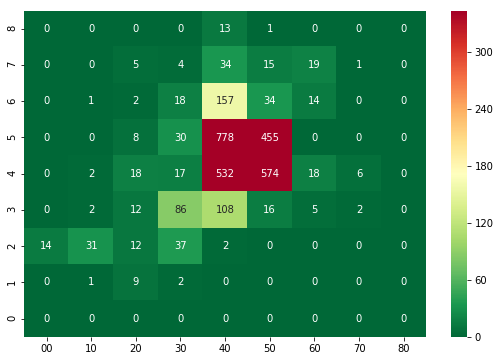

In [17]:
create_contour(1)

10800
3148.0


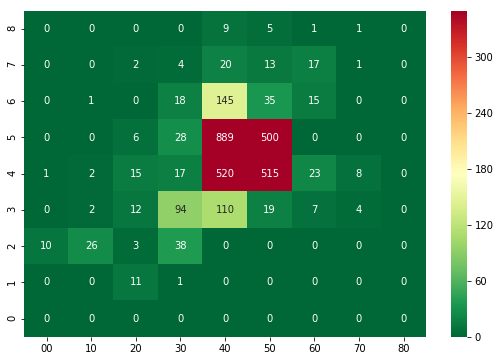

In [18]:
create_contour(2)

14400
3058.0


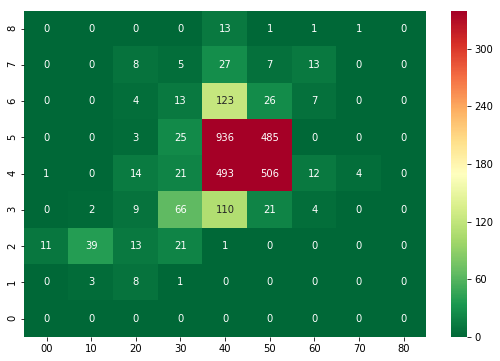

In [19]:
create_contour(3)

18000
2549.0


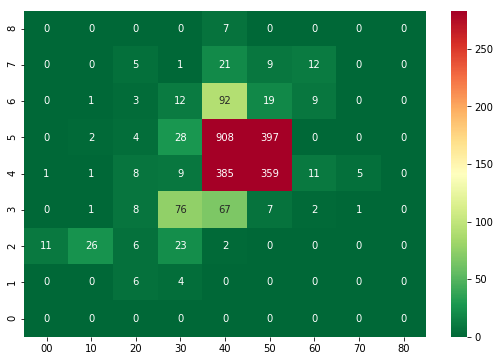

In [20]:
create_contour(4)

21600
1371.0


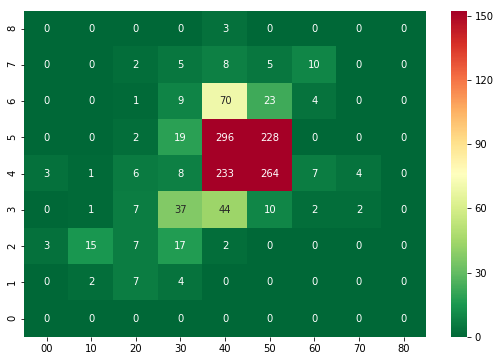

In [21]:
create_contour(5)

14772.0


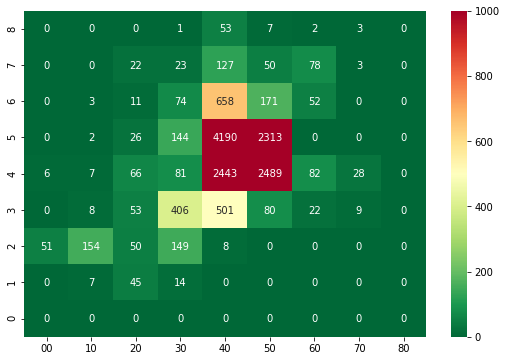

In [22]:
df_new = csv_array[people][ratio][seed][csv]['3600'].copy()
for _times in times_list:
    if _times != '3600':
        df_new += csv_array[people][ratio][seed][csv][_times].copy()

print(df_new.sum().sum())
plt.figure(figsize=(9,6))
sns.heatmap(df_new, annot=True, fmt='.0f', cmap='RdYlGn_r',
           vmax=1000, vmin=0)
    
# create_contour(df_new, '{0}seed{1}_{2}'.format(people, seed, csv))

In [23]:
def compensate_times(args):
    df = csv_array[args.dir][args.ratio][args.seed][args.csv].copy()
    if len(df.keys()) != len(times_list):
        empty_times = set(list(df.keys())) ^ set(times_list)
        for _times in empty_times:
            df[_times] = create_empty_base()
            csv_array[args.dir][args.ratio][args.seed][args.csv] = df
            
for_default(compensate_times)

In [24]:
for_list = get_for_list()
for _dir in for_list.dir:
    for _ratio in for_list.ratio:
        for _seed in for_list.seed:
            for _csv in for_list.csv:
                sum_array = 0
                for _times in times_list:
                    df = csv_array[_dir][_ratio][_seed][_csv][_times].copy()
    #                 print(df.sum().sum())
                    sum_array += df.sum().sum()
                print(_dir, _ratio, _seed, _csv)
                print(sum_array)
                print('')

p10000 r4 s123 census
8179.0

p10000 r4 s123 mobile
9879.0

p10000 r5 s123 census
10266.0

p10000 r5 s123 mobile
10079.0

p10000 r6 s123 census
12625.0

p10000 r6 s123 mobile
10327.0

p20000 r4 s123 census
16054.0

p20000 r4 s123 mobile
6687.0

p20000 r5 s123 census
19944.0

p20000 r5 s123 mobile
8396.0

p20000 r6 s123 census
24206.0

p20000 r6 s123 mobile
10086.0

p30000 r4 s123 census
24139.0

p30000 r4 s123 mobile
9549.0

p30000 r5 s123 census
30022.0

p30000 r5 s123 mobile
12244.0

p30000 r6 s123 census
37104.0

p30000 r6 s123 mobile
14772.0



# 各エリアの人数 / 全体人数 = 割合

In [25]:
csv_array_percent = {}
def percent(args, array):
    for _times in times_list:
        df = csv_array[args.dir][args.ratio][args.seed][args.csv][_times].copy()
        df /= df.sum().sum()
        array[args.dir][args.ratio][args.seed][args.csv][_times] = df
    
for_default_init(percent, csv_array_percent)

In [26]:
def create_contour_percent(time_number):
    time = times_list[time_number]
    print(time)
    df = csv_array_percent[people][ratio][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.3f', cmap='RdYlGn_r',
               vmax=0.02, vmin=0)

3600


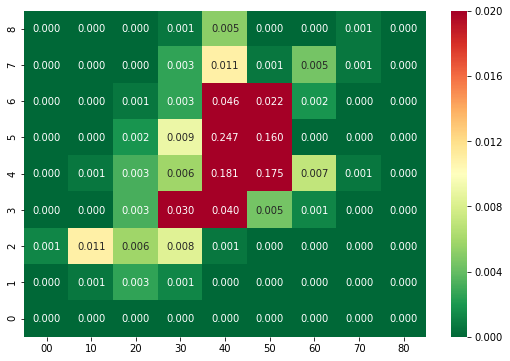

In [27]:
create_contour_percent(0)

7200


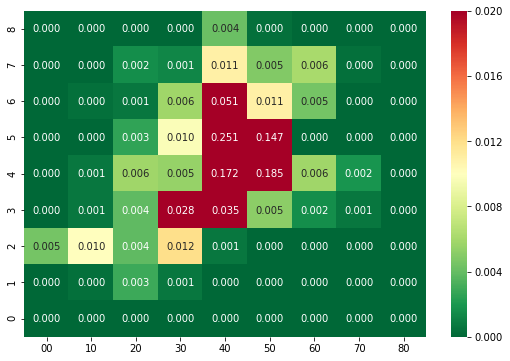

In [28]:
create_contour_percent(1)

10800


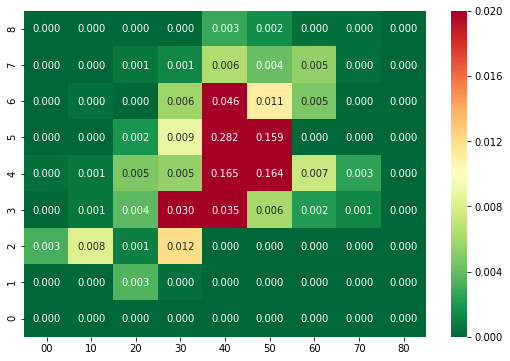

In [29]:
create_contour_percent(2)

14400


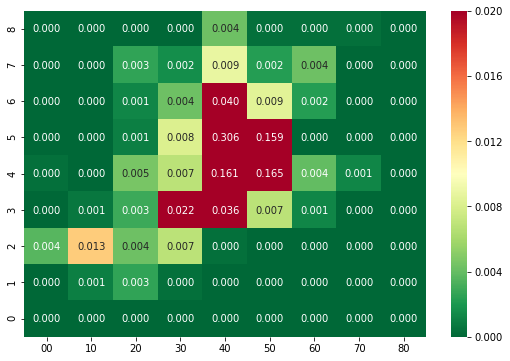

In [30]:
create_contour_percent(3)

18000


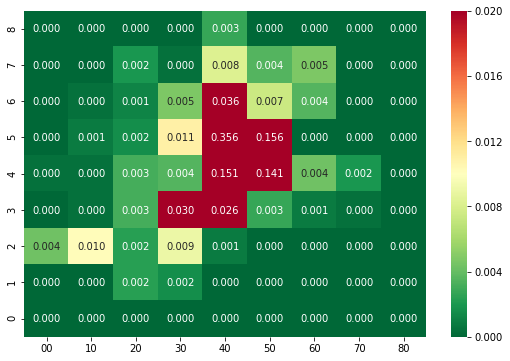

In [31]:
create_contour_percent(4)

21600


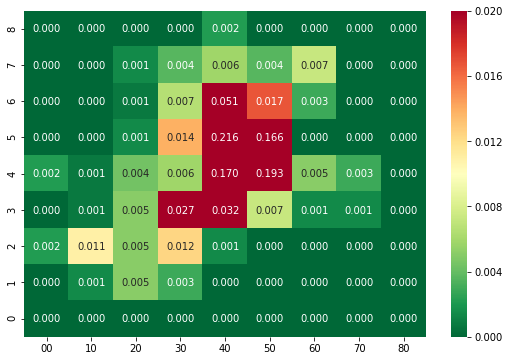

In [32]:
create_contour_percent(5)

# 1時間前とのpercentのdiff

In [33]:
csv_array_diff = {}
def diff(args, array):
    for index, _times in enumerate(times_list):
        df = csv_array_percent[args.dir][args.ratio][args.seed][args.csv][_times].copy()
        if _times != times_list[0]:
            df_diff = csv_array_percent[args.dir][args.ratio][args.seed][args.csv][times_list[index-1]]
            df /= df_diff
            df = df.replace(np.inf,np.nan).fillna(0)
            array[args.dir][args.ratio][args.seed][args.csv][_times] = df
    
for_default_init(diff, csv_array_diff)

/Users/kessapassa/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3772: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3772: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [34]:
def create_contour_diff(time_number):
    time = times_list[time_number]
    print(time)
    df = csv_array_diff[people][ratio][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.2f', cmap='RdYlGn_r',
               vmax=2.5, vmin=0.5)

7200


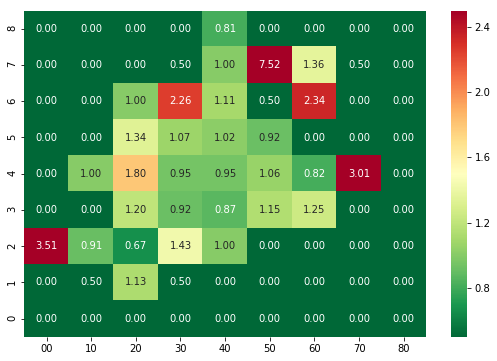

In [35]:
create_contour_diff(1)

10800


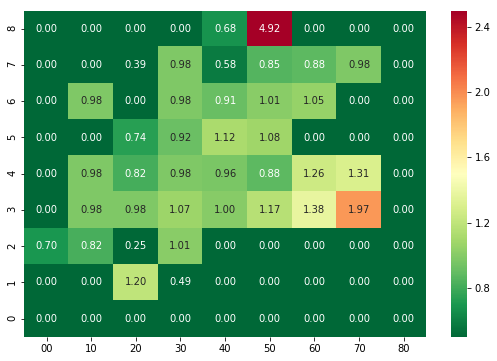

In [36]:
create_contour_diff(2)

14400


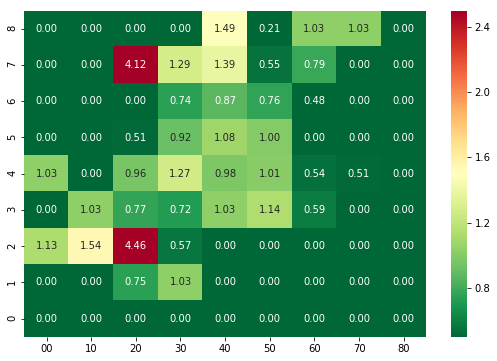

In [37]:
create_contour_diff(3)

18000


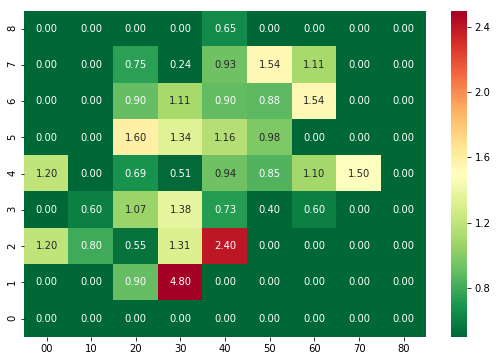

In [38]:
create_contour_diff(4)

21600


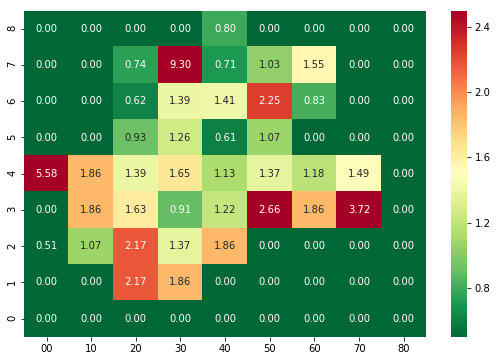

In [39]:
create_contour_diff(5)

# before_hour * diff

In [40]:
def create_corrected(time_number):
    time = times_list[time_number]
    print(time)
    
    before_target = 'census'
    diff_target = 'mobile'
    before_hour = csv_array[people][ratio][seed][before_target][times_list[time_number-1]]
    diff = csv_array_diff[people][ratio][seed][diff_target][time]
    corrected = before_hour * diff
    
    plt.figure(figsize=(9,6))
    sns.heatmap(corrected, annot=True, fmt='.1f', cmap='RdYlGn_r',
               vmax=200, vmin=0)
    print('補正値合計:   ',corrected.sum().sum())
    print('mobile合計: ',csv_array[people][ratio][seed]['mobile'][time].sum().sum())
    print('census合計: ',csv_array[people][ratio][seed]['census'][time].sum().sum())

7200
補正値合計:    3998.185817331815
mobile合計:  3095.0
census合計:  7949.0


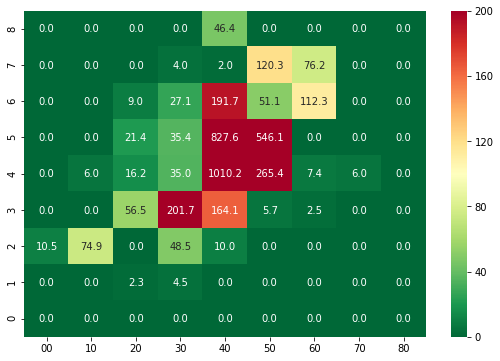

In [41]:
create_corrected(1)

10800
補正値合計:    7891.966609682253
mobile合計:  3148.0
census合計:  7897.0


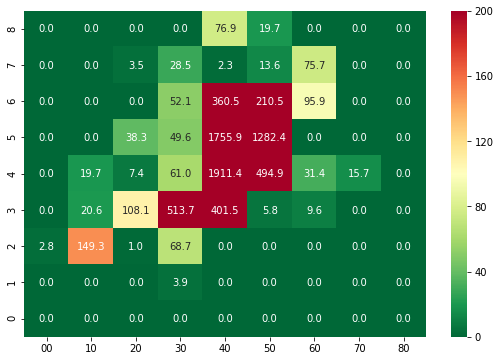

In [42]:
create_corrected(2)

14400
補正値合計:    7733.133898464329
mobile合計:  3058.0
census合計:  7273.0


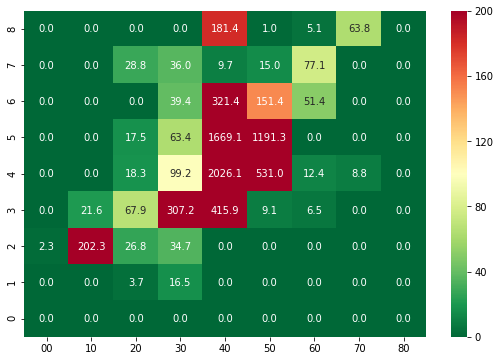

In [43]:
create_corrected(3)

18000
補正値合計:    7314.8219977675135
mobile合計:  2549.0
census合計:  5709.0


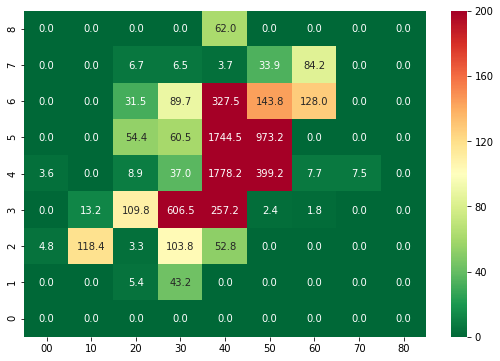

In [44]:
create_corrected(4)

21600
補正値合計:    6272.822010072299
mobile合計:  1371.0
census合計:  4306.0


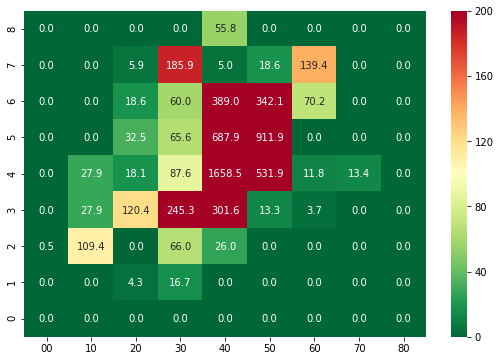

In [45]:
create_corrected(5)

# percent * normal

In [46]:
def create_corrected(time_number):
    time = times_list[time_number]
    print(time)
    
    percent_target = 'mobile'
    normal_target = 'census'
    percent = csv_array_percent[people][ratio][seed][percent_target][time]
    normal = csv_array[people][ratio][seed][normal_target][time]
    corrected = percent * normal
    
    plt.figure(figsize=(9,6))
    sns.heatmap(corrected, annot=True, fmt='.1f', cmap='RdYlGn_r',
               vmax=200, vmin=0)
    print('補正値合計:   ',corrected.sum().sum())
    print(percent_target, '合計: ',csv_array[people][ratio][seed][percent_target][time].sum().sum())
    print(normal_target, '合計: ',csv_array[people][ratio][seed][normal_target][time].sum().sum())

In [47]:
# def create_corrected(time_number):
#     time = times_list[time_number]
#     print(time)
#     print(csv_array_percent[people][seed]['census'][time].sum().sum())
#     corrected = csv_array_percent[people][seed]['census'][time] * csv_array[people][seed]['mobile'][time]
# #     create_contour_base(corrected)
#     plt.figure(figsize=(9,6))
#     sns.heatmap(df, annot=True, fmt='.2f', cmap='RdYlGn_r',
#                vmax=df.sum().mean(), vmin=0)
#     print('補正値合計:   ',corrected.sum().sum())
#     print('ノーマル合計: ',csv_array[people][seed]['mobile'][time].sum().sum())

7200
補正値合計:    1069.3269789983847
mobile 合計:  3095.0
census 合計:  7949.0


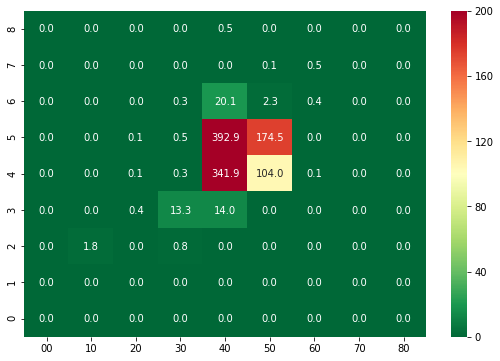

In [48]:
create_corrected(1)

10800
補正値合計:    1104.7538119440915
mobile 合計:  3148.0
census 合計:  7897.0


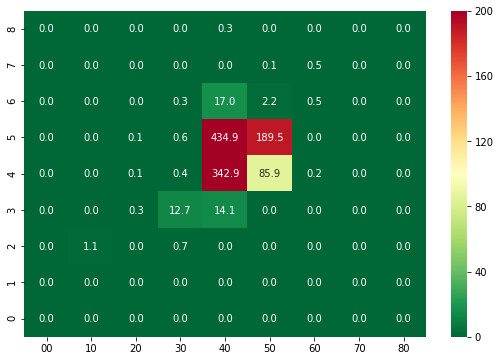

In [49]:
create_corrected(2)

14400
補正値合計:    1043.1265533028122
mobile 合計:  3058.0
census 合計:  7273.0


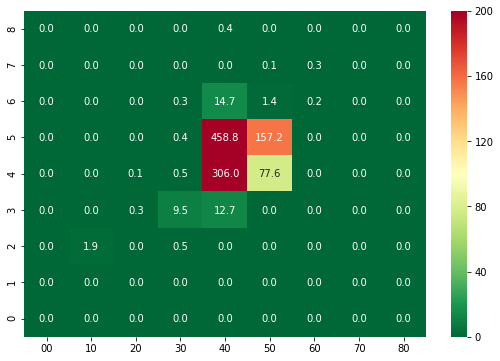

In [50]:
create_corrected(3)

18000
補正値合計:    844.3460180462927
mobile 合計:  2549.0
census 合計:  5709.0


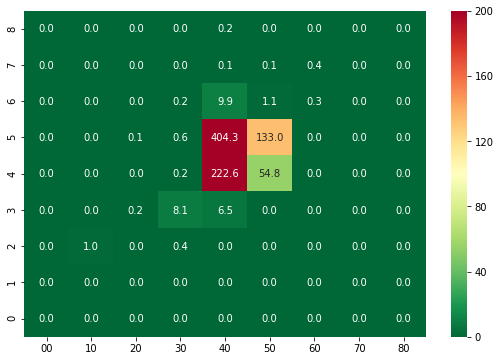

In [51]:
create_corrected(4)

21600
補正値合計:    561.202042304887
mobile 合計:  1371.0
census 合計:  4306.0


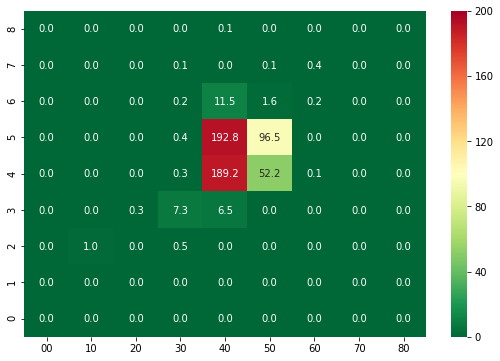

In [52]:
create_corrected(5)

# 1時間前とのdiff(normal)

In [53]:
csv_array_diff_normal = {}
def diff_normal(args, array):
    for index, _times in enumerate(times_list):
        df = csv_array[args.dir][args.ratio][args.seed][args.csv][_times].copy()
        if _times != times_list[0]:
            df_diff = csv_array[args.dir][args.ratio][args.seed][args.csv][times_list[index-1]]
            df /= df_diff
#             df = df.replace(np.inf,np.nan).fillna(0)
            array[args.dir][args.ratio][args.seed][args.csv][_times] = df
    
for_default_init(diff_normal, csv_array_diff_normal)

In [54]:
def create_contour_diff_normal(time_number):
    time = times_list[time_number]
    df = csv_array_diff_normal[people][ratio][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.2f', cmap='RdYlGn_r',
               vmax=2, vmin=1)

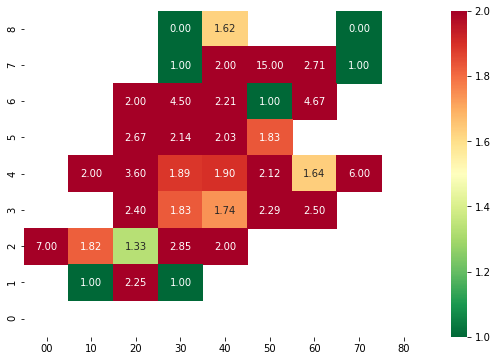

In [55]:
create_contour_diff_normal(1)

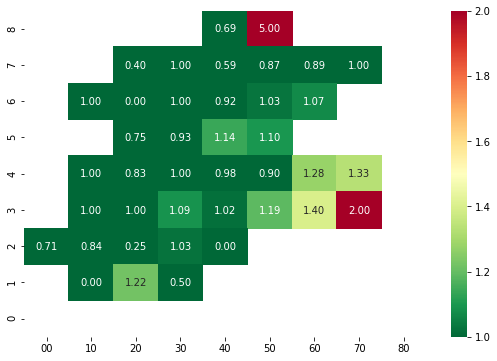

In [56]:
create_contour_diff_normal(2)

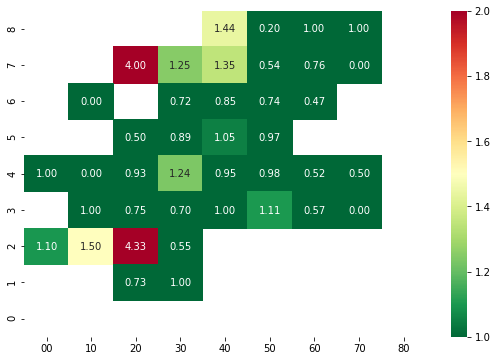

In [57]:
create_contour_diff_normal(3)

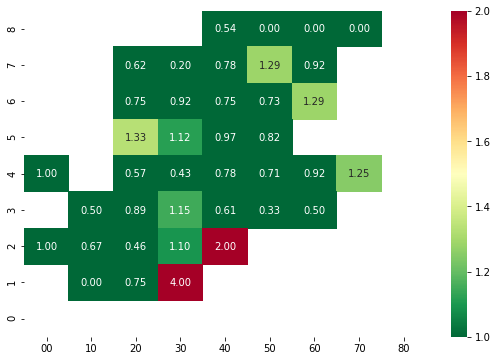

In [58]:
create_contour_diff_normal(4)

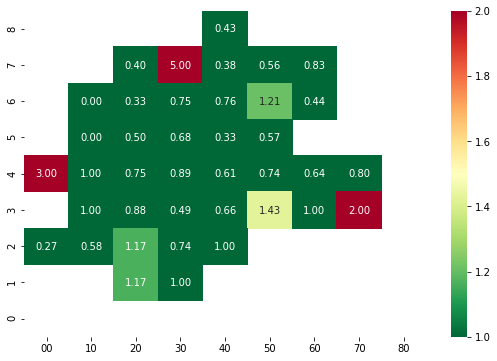

In [59]:
create_contour_diff_normal(5)